연속된 수치데이터를 범주형으로 만들고자 함 

why? 수치가 너무 세분화 되어 있으면 각 범위의 샘플 수가 적어지고 과적합(overfitting) 발생 가능

# 1. 데이터 구성

•Pregnancies : 임신 횟수

•Glucose : 2시간 동안의 경구 포도당 내성 검사에서 혈장 포도당 농도

•BloodPressure : 이완기 혈압 (mm Hg)

•SkinThickness : 삼두근 피부 주름 두께 (mm), 체지방을 추정하는데 사용되는 값

•Insulin : 2시간 혈청 인슐린 (mu U / ml)

•BMI : 체질량 지수 (체중kg / 키(m)^2)

•DiabetesPedigreeFunction : 당뇨병 혈통 기능

•Age : 나이

•Outcome : 768개 중에 268개의 결과 클래스 변수(0 또는 1)는 1이고 나머지는 0입니다.

# 2. 필요한 라이브러리 로드



In [9]:
# 데이터 분석을 위한 pandas, 수치 계산을 위한 numpy
# 시각화를 위한 seaborn, matplotlib.pyplot 로드

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 3. 데이터셋 로드

In [10]:
df = pd.read_csv("data/diabetes.csv")
df.shape

(768, 9)

In [11]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# 4. Feature Engineering

## 4-1. 수치형 변수를 범주형 변수로 만들기

In [12]:
df["Pregnancies_high"] = df["Pregnancies"] > 6
df[["Pregnancies","Pregnancies_high"]].head()

,Pregnancies,Pregnancies_high
0,6,False
1,1,False
2,8,True
3,1,False
4,0,False


In [51]:
# One-Hot-Encoding
# 수치 -> 범주 -> 수치
df["Age_low"] = df["Age"] < 30
df["Age_middle"] = (df["Age"] >= 30) & (df["Age"] <= 60)
df["Age_high"] = df["Age"] > 60
df[["Age", "Age_low","Age_middle", "Age_high"]].head()

# 성능이 오히려 낮아짐 - feature engineering을 했다고 무조건 높아지는 것은 아님

,Age,Age_low,Age_middle,Age_high
0,50,False,True,False
1,31,False,True,False
2,32,False,True,False
3,21,True,False,False
4,33,False,True,False


<AxesSubplot:xlabel='Age_low', ylabel='count'>

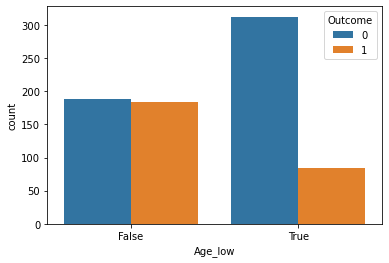

In [52]:
sns.countplot(data=df, x="Age_low", hue="Outcome")

## 4-2. 결측치 다루기

In [70]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
Pregnancies_high            0
Age_low                     0
Age_middle                  0
Age_high                    0
dtype: int64

In [71]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [141]:
df["Insulin"]
# 0인 값들을 처리해주기
df["Insulin_nan"] = df["Insulin"].replace(0, np.nan)
df["Insulin_nan"].head()

0      NaN
1      NaN
2      NaN
3     94.0
4    168.0
Name: Insulin_nan, dtype: float64

In [142]:
df["Insulin_nan"].isnull().sum()

374

In [143]:
df["Insulin_nan"].isnull().mean()
# 결측치의 비율이 48% 정도인 것을 알 수 있음

0.4869791666666667

In [144]:
df.groupby(["Outcome"])["Insulin","Insulin_nan"].agg(["mean", "median"])


<ipython-input-144-95c7b0a13634>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby(["Outcome"])["Insulin","Insulin_nan"].agg(["mean", "median"])


Insulin        Insulin_nan       
               mean median        mean median
Outcome                                      
0         68.792000     39  130.287879  102.5
1        100.335821      0  206.846154  169.5

In [145]:
# 결측치 채우기
df.loc[(df["Outcome"] == 1) & (df["Insulin_nan"].isnull()),"Insulin_nan"] = 169.5
df.loc[(df["Outcome"] == 0) & (df["Insulin_nan"].isnull()),"Insulin_nan"] = 102.5

## 4-3. 정규 분포 만들기
왜도 - 한쪽으로 치우친 정도

첨도 - 뾰족한 정도

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Insulin', ylabel='Density'>

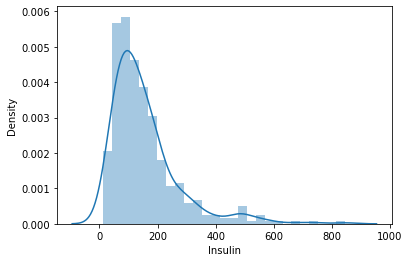

In [168]:
sns.distplot(df.loc[df["Insulin"] > 0, "Insulin"])

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Insulin', ylabel='Density'>

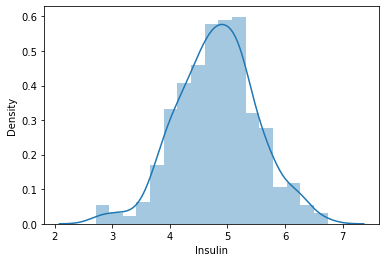

In [171]:
sns.distplot(np.log(df.loc[df["Insulin"] > 0, "Insulin"] + 1))
# 로그 변환을 해주면 정규 분포를 이룸

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Insulin_nan', ylabel='Density'>

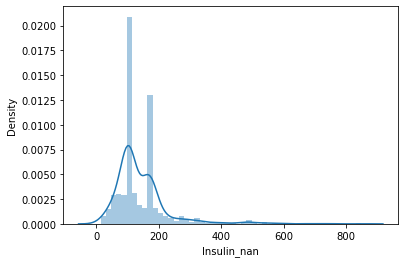

In [174]:
sns.distplot(df["Insulin_nan"])

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Insulin_log', ylabel='Density'>

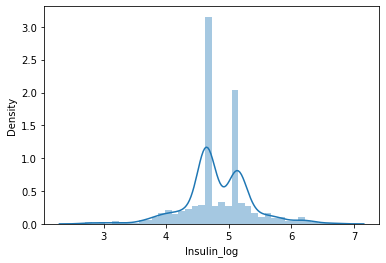

In [175]:
df["Insulin_log"] = np.log(df["Insulin_nan"] + 1)
sns.distplot(df["Insulin_log"])

## 4-4. 상관관계 분석을 통해 파생변수 만들기

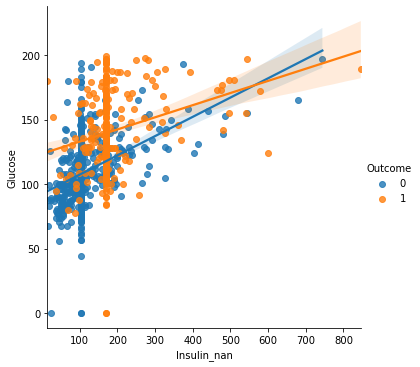

In [232]:
sns.lmplot(data=df, x="Insulin_nan", y="Glucose", hue="Outcome")

In [207]:
df["low_glu_insulin"] = (df["Glucose"] < 100) & (df["Insulin_nan"] <= 102.5)

In [208]:
pd.crosstab(df["Outcome"], df["low_glu_insulin"])
# glucose와 insulin이 낮으면 발병률이 낮음을 알 수 있음

low_glu_insulin,False,True
Outcome,,
0,332,168
1,263,5


## 4-5. 이상치 다루기

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Insulin_nan'>

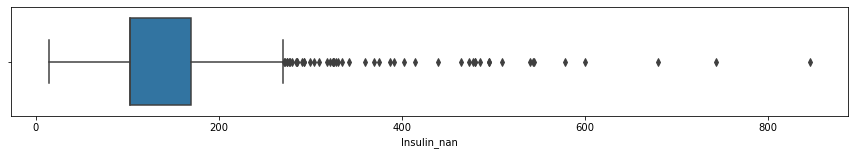

In [234]:
plt.figure(figsize=(15, 2))
sns.boxplot(df["Insulin_nan"])

In [236]:
df["Insulin_nan"].describe()
# 75%값과 max값 차이가 많이 남

count    768.000000
mean     141.753906
std       89.100847
min       14.000000
25%      102.500000
50%      102.500000
75%      169.500000
max      846.000000
Name: Insulin_nan, dtype: float64

In [ ]:
IQR3 = df["Insulin_nan"].quantile(0.75)
IQR1 = df["Insulin_nan"].quantile(0.25)
IQR = IQR3 - IQR1

# 5. 학습,예측 데이터셋 나누기

In [237]:
# 8:2 비율로 구하기 위해 전체 데이터 행의 80%에 해당하는 값을 구해서 split_count변수에 담아줌
split_count = int(df.shape[0]*0.8)
split_count

614

In [238]:
# train, test로 슬라이싱을 통해 데이터를 나눔
train = df[:split_count].copy()
train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Pregnancies_high,Age_low,Age_middle,Age_high,Insulin_nan,Insulin_log,low_glu_insulin
0,6,148,72,35,0,33.6,0.627,50,1,False,False,True,False,169.5,5.138735,False
1,1,85,66,29,0,26.6,0.351,31,0,False,False,True,False,102.5,4.639572,True
2,8,183,64,0,0,23.3,0.672,32,1,True,False,True,False,169.5,5.138735,False
3,1,89,66,23,94,28.1,0.167,21,0,False,True,False,False,94.0,4.553877,True
4,0,137,40,35,168,43.1,2.288,33,1,False,False,True,False,168.0,5.129899,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,1,111,62,13,182,24.0,0.138,23,0,False,True,False,False,182.0,5.209486,False
610,3,106,54,21,158,30.9,0.292,24,0,False,True,False,False,158.0,5.068904,False
611,3,174,58,22,194,32.9,0.593,36,1,False,False,True,False,194.0,5.273000,False
612,7,168,88,42,321,38.2,0.787,40,1,True,False,True,False,321.0,5.774552,False


In [239]:
test = df[split_count:].copy()
test

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Pregnancies_high,Age_low,Age_middle,Age_high,Insulin_nan,Insulin_log,low_glu_insulin
614,11,138,74,26,144,36.1,0.557,50,1,True,False,True,False,144.0,4.976734,False
615,3,106,72,0,0,25.8,0.207,27,0,False,True,False,False,102.5,4.639572,False
616,6,117,96,0,0,28.7,0.157,30,0,False,False,True,False,102.5,4.639572,False
617,2,68,62,13,15,20.1,0.257,23,0,False,True,False,False,15.0,2.772589,True
618,9,112,82,24,0,28.2,1.282,50,1,True,False,True,False,169.5,5.138735,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0,True,False,False,True,180.0,5.198497,False
764,2,122,70,27,0,36.8,0.340,27,0,False,True,False,False,102.5,4.639572,False
765,5,121,72,23,112,26.2,0.245,30,0,False,False,True,False,112.0,4.727388,False
766,1,126,60,0,0,30.1,0.349,47,1,False,False,True,False,169.5,5.138735,False


# 6. 학습과 예측에 사용할 컬럼

In [240]:
#feature_names라는 변수에 학습과 예측에 사용할 컬럼명 저장
feature_names = train.columns.tolist()
feature_names.remove("Pregnancies")
feature_names.remove("Outcome")
feature_names.remove("Age_low")
feature_names.remove("Age_middle")
feature_names.remove("Age_high")
feature_names.remove("Insulin")
feature_names.remove("Insulin_nan")

feature_names

['Glucose',
 'BloodPressure',
 'SkinThickness',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Pregnancies_high',
 'Insulin_log',
 'low_glu_insulin']

# 7. 정답값이자 예측해야 할 값

In [241]:
#lable_name에 예측할 컬럼의 이름 저장
label_name = "Outcome"
label_name

'Outcome'

# 8. 학습,예측 데이터셋 만들기

In [242]:
#학습 세트 만들기 ex)시험의 기출 문제
X_train = train[feature_names]
X_train

,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age,Pregnancies_high,Insulin_log,low_glu_insulin
0,148,72,35,33.6,0.627,50,False,5.138735,False
1,85,66,29,26.6,0.351,31,False,4.639572,True
2,183,64,0,23.3,0.672,32,True,5.138735,False
3,89,66,23,28.1,0.167,21,False,4.553877,True
4,137,40,35,43.1,2.288,33,False,5.129899,False
...,...,...,...,...,...,...,...,...,...
609,111,62,13,24.0,0.138,23,False,5.209486,False
610,106,54,21,30.9,0.292,24,False,5.068904,False
611,174,58,22,32.9,0.593,36,False,5.273000,False
612,168,88,42,38.2,0.787,40,True,5.774552,False


In [243]:
#정답 값 만들기 ex)기출문제 정답
y_train = train[label_name]
y_train

0      1
1      0
2      1
3      0
4      1
      ..
609    0
610    0
611    1
612    1
613    0
Name: Outcome, Length: 614, dtype: int64

In [244]:
# 예측에 사용할 데이터 셋 ex)실전 시험 문제
X_test = test[feature_names]
X_test

,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age,Pregnancies_high,Insulin_log,low_glu_insulin
614,138,74,26,36.1,0.557,50,True,4.976734,False
615,106,72,0,25.8,0.207,27,False,4.639572,False
616,117,96,0,28.7,0.157,30,False,4.639572,False
617,68,62,13,20.1,0.257,23,False,2.772589,True
618,112,82,24,28.2,1.282,50,True,5.138735,False
...,...,...,...,...,...,...,...,...,...
763,101,76,48,32.9,0.171,63,True,5.198497,False
764,122,70,27,36.8,0.340,27,False,4.639572,False
765,121,72,23,26.2,0.245,30,False,4.727388,False
766,126,60,0,30.1,0.349,47,False,5.138735,False


In [245]:
# 예측의 정답값 ex)실전 시험 문제의 정답 - 현실에서는 모름
y_test = test[label_name]
y_test

614    1
615    0
616    0
617    0
618    1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 154, dtype: int64

# 9. 머신러닝 알고리즘 가져오기

In [246]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

# 10. 학습시키기

In [247]:
model.fit(X_train,y_train) # 기출문제 공부

DecisionTreeClassifier()

# 11. 예측

In [248]:
y_predict = model.predict(X_test) # 실전 시험 문제 풀기 -> 정답은 주어지지 않음

# 12. 트리 알고리즘 분석하기

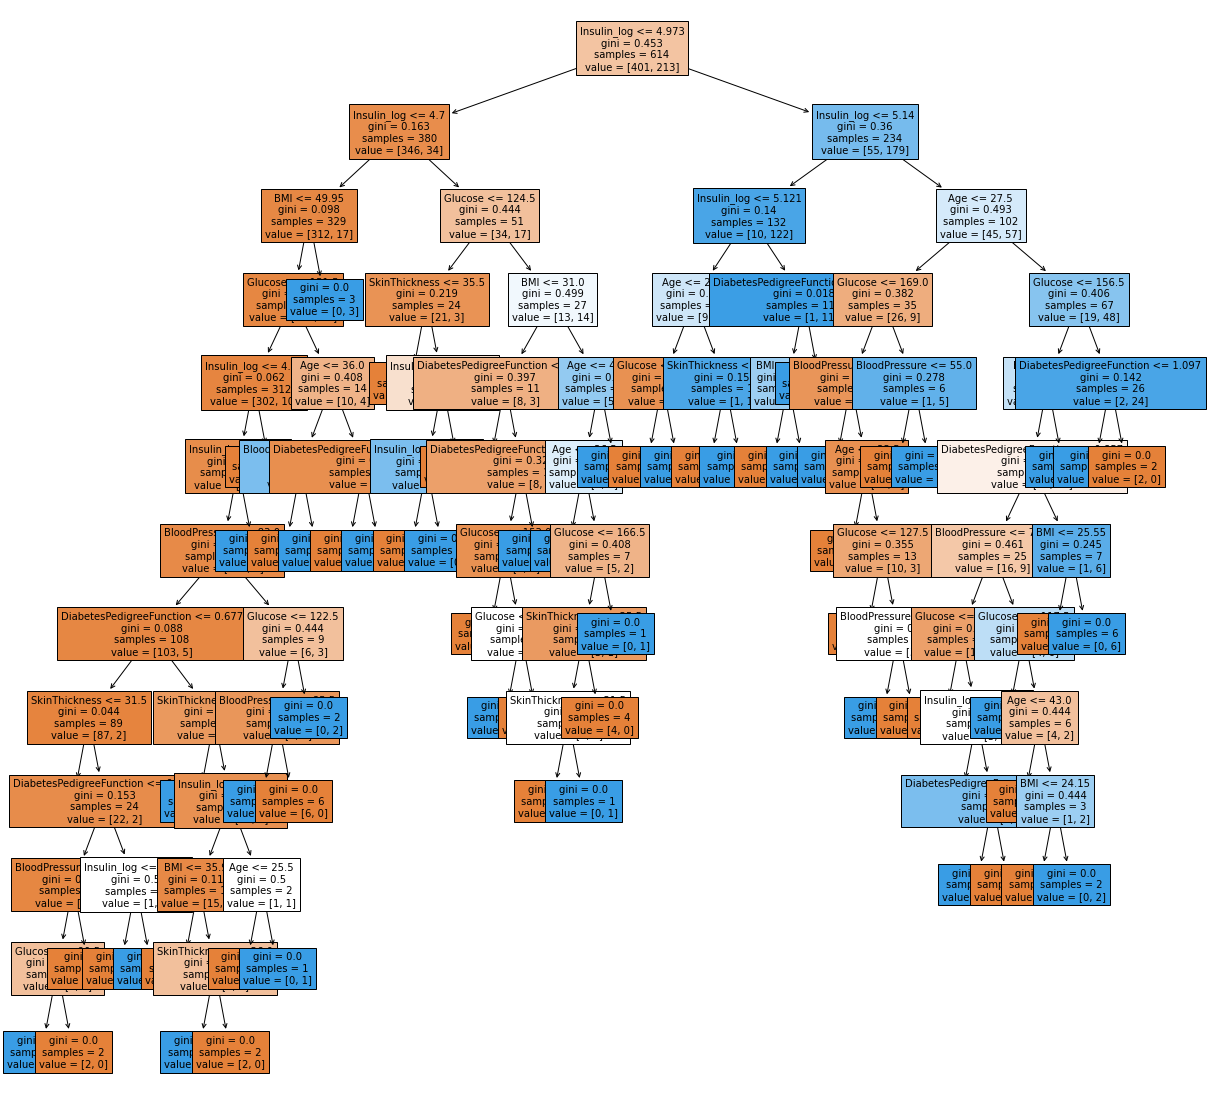

In [221]:
# 의사결정나무 시각화
from sklearn.tree import plot_tree
plt.figure(figsize = (20,20))
tree = plot_tree(model,feature_names = feature_names,
                filled = True, fontsize= 10)
#글루코스가 가장 좋은 기준임을 확인할 수 있음
# --> 인슐린 결측치 채운 후 인슐린으로 변경됨 

In [222]:
# 피처의 중요도 추출
model.feature_importances_

array([0.10067856, 0.04775052, 0.03017517, 0.05957919, 0.05126155,
       0.09302282, 0.        , 0.61753218, 0.        ])

<AxesSubplot:>

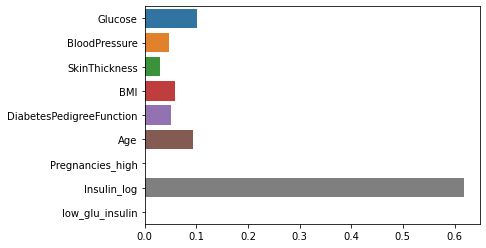

In [223]:
# 피처의 중요도 시각화 하기
sns.barplot(x=model.feature_importances_,y=feature_names)

# 13. 정확도 측정하기

In [228]:
# 실제값 - 예측값을 뺴주면 맞은것(같은값)은 0, 틀린 것은 1 출력
# 절대값 씌워서 다르게 예측한 경우 구하기
diff_count = abs(y_test - y_predict).sum()
diff_count

17

In [229]:
# 정확도 기존 75%
# 인슐린 결측치를 평균값으로 채운 후 83%
# 인슐린 결측치를 중앙값으로 채우면 88%
# 인슐린&글루코스 상관계수로 파생변수 생성 후 89%
(len(y_test) - diff_count)/len(y_test)

0.8896103896103896

In [226]:
# 미리 구현된 알고리즘으로 구해보기
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_predict)

0.8896103896103896

In [227]:
# model의 score로 계산해보기
model.score(X_test,y_test)

0.8896103896103896